# Trabajo Práctico 1

Integrantes del grupo:

- Cajachuán Arroyo, Kevin André
- Doffo, Augusto Santiago
- Herrera, Daniel Fernando

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from matplotlib import colors

In [2]:
def get_filenames(dir: str) -> list :
    return list(map(lambda name: f"{dir}/{name}", os.listdir(dir)))

## Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [3]:
chromatic_coords_dir = "coord_cromaticas"
chromatic_filenames = get_filenames(chromatic_coords_dir)

In [4]:
def chromatic_coords(img: np.ndarray) -> np.ndarray:
    channels_sum = np.sum(img, axis=-1, keepdims=True)
    return np.divide(img, channels_sum, out=np.zeros_like(img, dtype=float), where=channels_sum!=0.0)

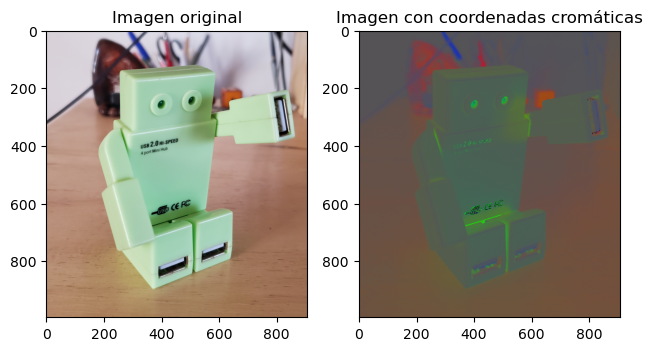

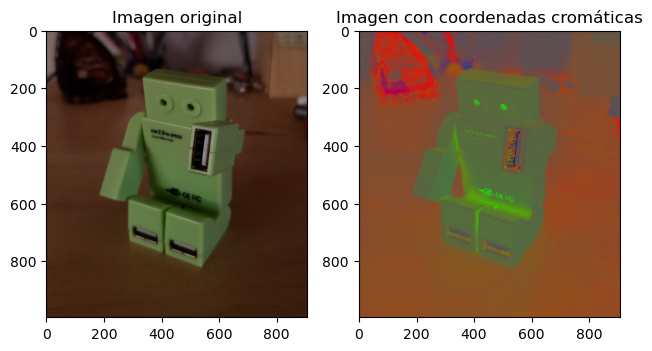

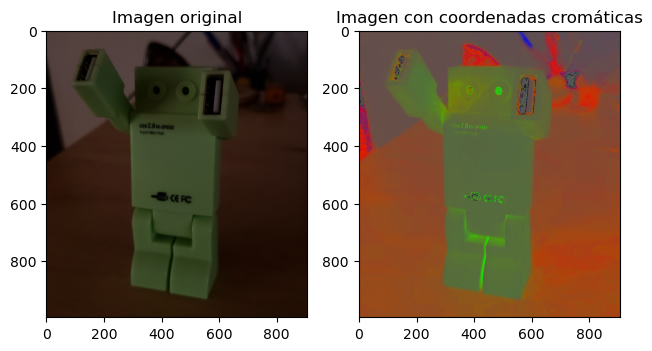

In [5]:
for filename in chromatic_filenames:
    img = cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2RGB)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax1.set_title('Imagen original')
    ax2.imshow(chromatic_coords(img))
    ax2.set_title('Imagen con coordenadas cromáticas')
    plt.tight_layout()
    plt.show()

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [6]:
white_patch_dir = "white_patch"
white_patch_filenames = get_filenames(white_patch_dir)

In [7]:
def white_patch(img: np.ndarray) -> np.ndarray:
    channels_max = np.max(img, axis=(0,1), keepdims=True)
    return np.round(255.0 * img / channels_max).astype(np.uint8)

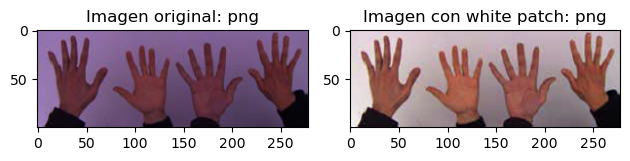

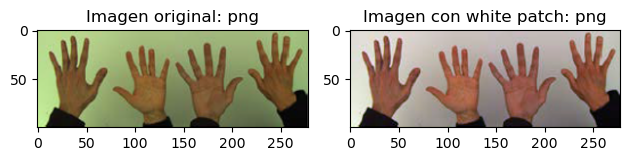

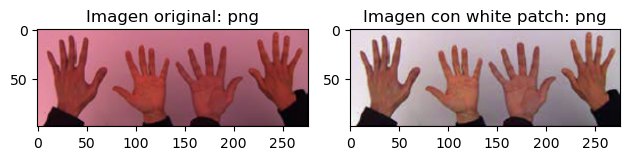

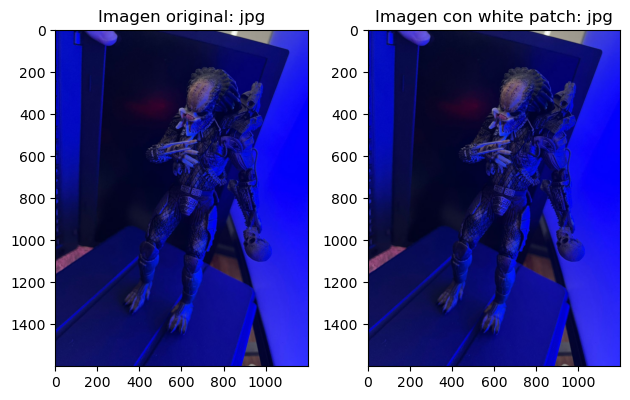

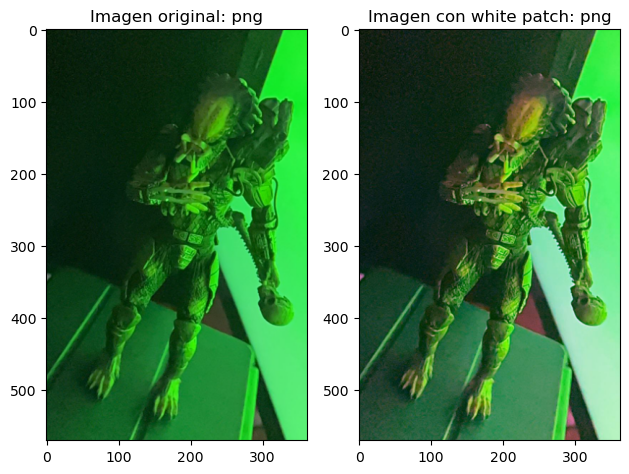

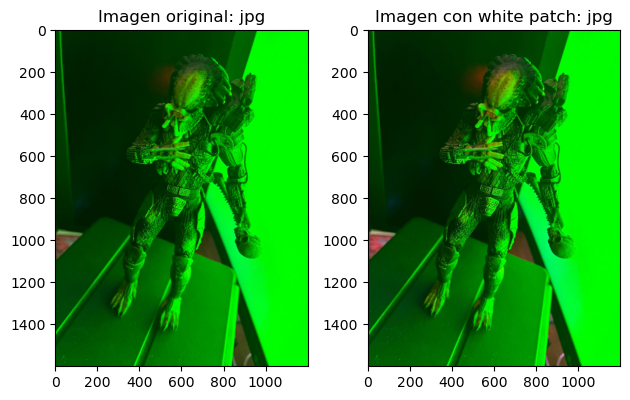

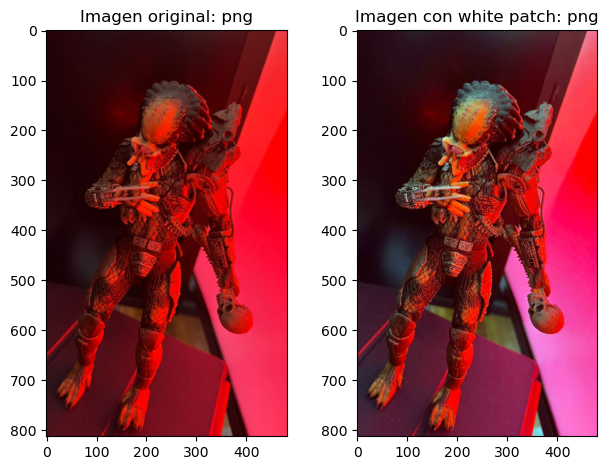

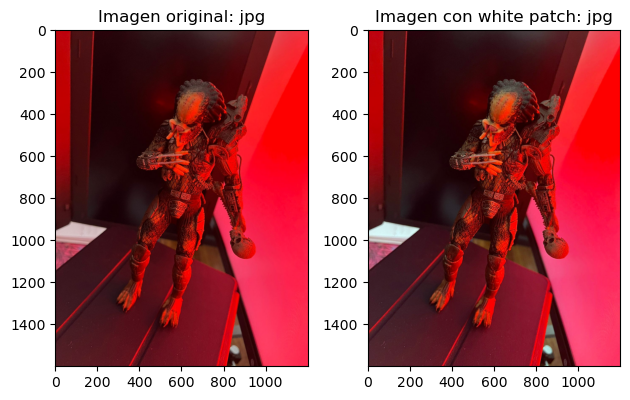

In [8]:
for filename in white_patch_filenames:
    img = cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2RGB)
    ext = filename.split('.')[1]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax1.set_title(f'Imagen original: {ext}')
    ax2.imshow(white_patch(img))
    ax2.set_title(f'Imagen con white patch: {ext}')
    plt.tight_layout()
    plt.show()

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

La imagen resultante es igual a la original
La imagen original tiene al menos un punto blanco puro (255, 255, 255)


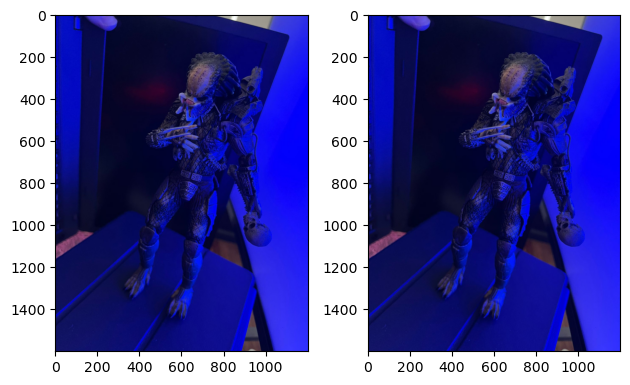

In [9]:
for filename in white_patch_filenames:
    img = cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2RGB)
    wp = white_patch(img)

    is_same_img = np.all(img == wp)
    if not is_same_img:
        continue
    print("La imagen resultante es igual a la original")
    has_pure_white = np.any(np.all(img==[255, 255, 255], axis=-1))
    print("La imagen original tiene al menos un punto blanco puro (255, 255, 255)")
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(wp)
    plt.tight_layout()
    plt.show()

- Uno de los problemas del algoritmo White Patch es que, si un píxel de la imagen original es blanco puro (255, 255, 255), la imagen resultante tras aplicar White Patch será idéntica a la original. Además, en algunos casos, debido a una iluminación desigual de un solo color, puede ser difícil notar diferencias entre la imagen procesada y la original.

- Otro punto a considerar es la extensión de las imágenes, como PNG y JPG. PNG es un formato sin pérdida, lo que significa que no se pierde información de color o detalles durante la compresión, permitiendo que el algoritmo White Patch funcione mejor al tener acceso a una gama de colores más precisa. Por otro lado, JPG utiliza compresión con pérdida (lossy compression), que descarta información para reducir el tamaño del archivo. Esto puede generar artefactos o degradación en los detalles finos, afectando la precisión del White Patch al distorsionar o simplificar los datos de color.

- Además, PNG y JPG tienen diferentes profundidades de color. PNG admite una mayor profundidad, lo que le permite representar colores con más precisión, mientras que JPG suele limitarse a 8 bits por canal. Dado que el algoritmo White Patch ajusta los colores basándose en los máximos de cada canal, se beneficiará más al trabajar con imágenes PNG, que ofrecen un rango dinámico más amplio y datos de color más completos.

## Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

In [10]:
img1 = cv.imread("img1_tp.png", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("img2_tp.png", cv.IMREAD_GRAYSCALE)

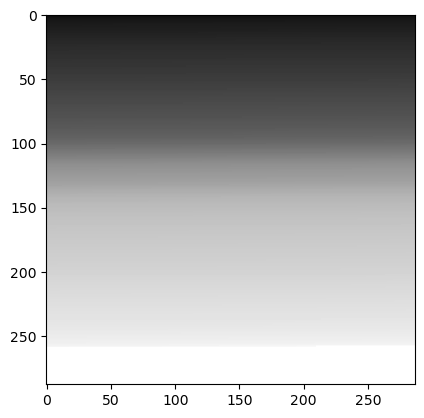

In [11]:
plt.figure()
plt.imshow(img1, cmap='gray')
plt.show()

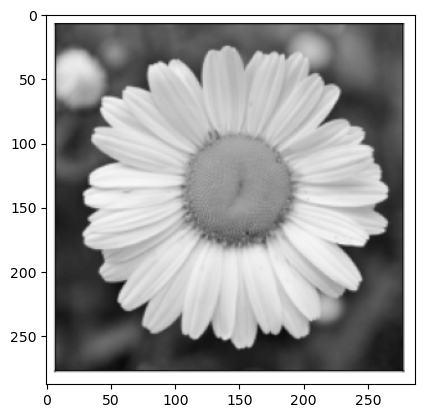

In [12]:
plt.figure()
plt.imshow(img2, cmap='gray')
plt.show()

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

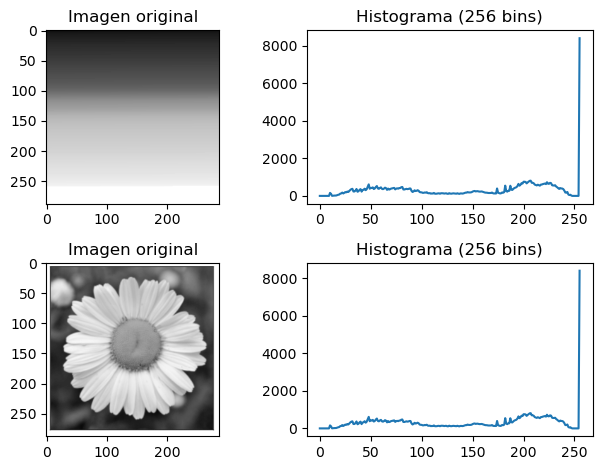

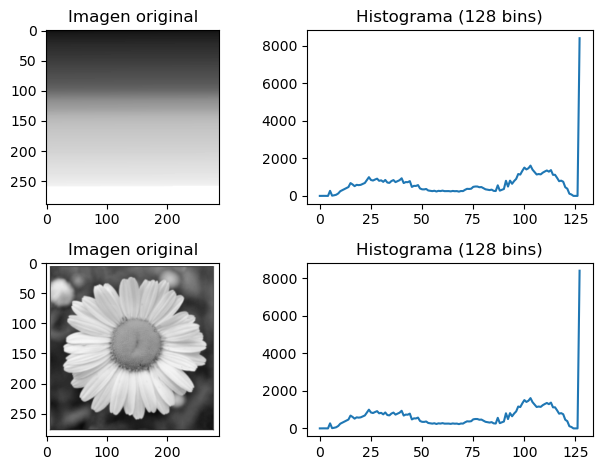

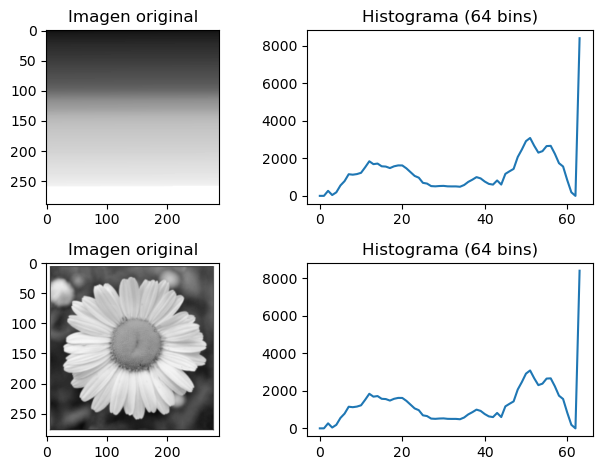

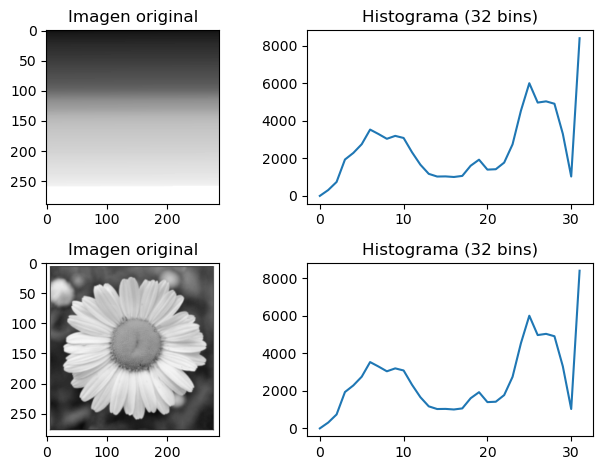

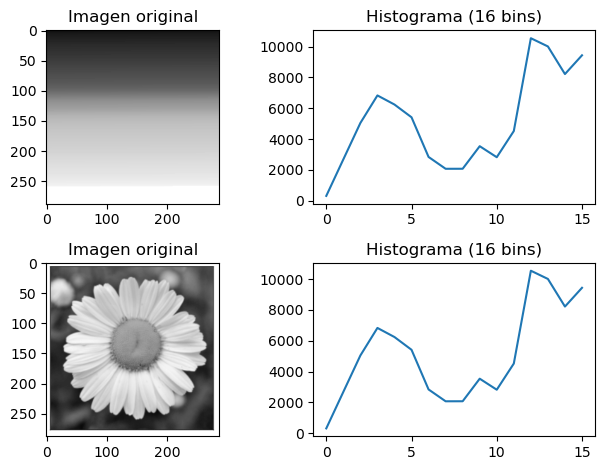

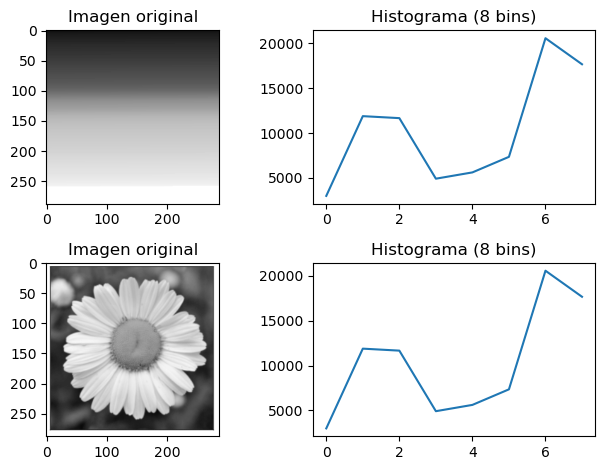

In [13]:
bins = [256, 128, 64, 32, 16, 8]

for bin in bins:
    hist1 = cv.calcHist([img1], channels=[0], mask=None, histSize=[bin], ranges=[0, 256])
    hist2 = cv.calcHist([img2], channels=[0], mask=None, histSize=[bin], ranges=[0, 256])
    fig = plt.figure()

    # Imagen original
    ax1 = plt.subplot(221)
    ax1.imshow(img1, cmap='gray')
    ax1.set_title("Imagen original")
    
    # Histograma
    ax2 = plt.subplot(222)
    ax2.plot(hist1)
    ax2.set_title(f"Histograma ({bin} bins)")

    # Imagen original
    ax3 = plt.subplot(223)
    ax3.imshow(img2, cmap='gray')
    ax3.set_title("Imagen original")

    # Histograma
    ax4 = plt.subplot(224)
    ax4.plot(hist2)
    ax4.set_title(f"Histograma ({bin} bins)")

    plt.tight_layout()
    plt.show()

Aunque el contenido de las imágenes sea completamente diferente, sus histogramas pueden ser idénticos, independientemente de la cantidad de bins utilizada. Por esta razón, un histograma por sí solo no sería útil como 'feature' para algoritmos de detección o clasificación, ya que estos no dependen del contenido de la imagen, sino de los colores, sin considerar su ubicación. Sin embargo, con información adicional sobre la imagen, los histogramas podrían ser útiles para estas tareas.

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

In [14]:
img_to_seg = cv.cvtColor(cv.imread("segmentacion.png"), cv.COLOR_BGR2RGB)

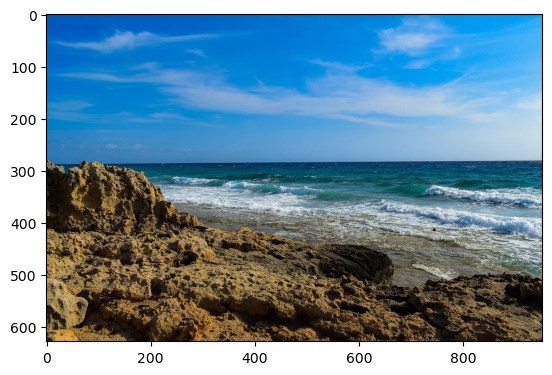

In [15]:
plt.figure()
plt.imshow(img_to_seg)
plt.show()

In [16]:
def plot_hist(img: np.ndarray, channels: str = "RGB") -> None:
    colors = ["red", "green", "blue"]
    channels_list = list(channels)
    _, axes = plt.subplots(3, 1)
    for index, ax in enumerate(axes):
        hist = cv.calcHist([img], channels=[index], mask=None, histSize=[256], ranges=[0, 256])
        ax.plot(hist, color=colors[index])
        ax.set_title(f"Histograma del canal {channels_list[index]}")
        ax.minorticks_on()
        ax.xaxis.set_ticks(np.arange(0, 256, 20))
        ax.grid(visible=True, which='both')

    plt.tight_layout()
    plt.show()

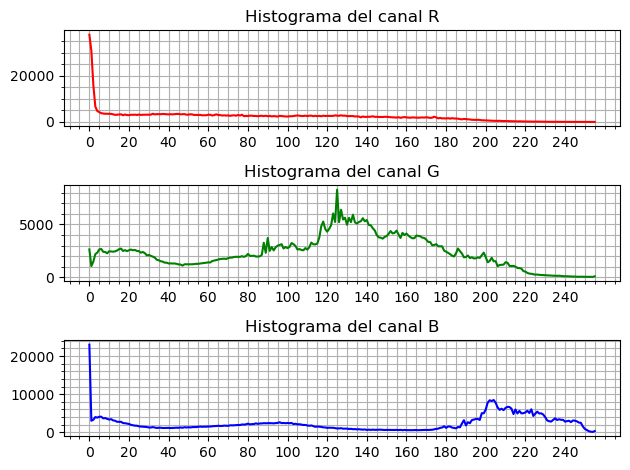

In [17]:
plot_hist(img_to_seg)

Se observa que hay muchos pixeles con valores de bajos, sobre todo en los canales rojo y verde.

### Histograma 3D RGB

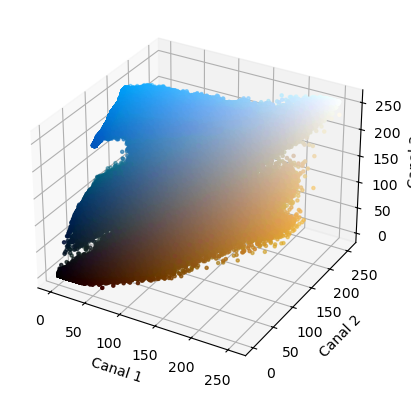

In [18]:
c1, c2, c3 = cv.split(img_to_seg)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_to_seg.reshape((np.shape(img_to_seg)[0] * np.shape(img_to_seg)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

En el histograma 3D en RGB, no se observan separaciones claras que puedan ser útiles para una segmentación. En su lugar, se aprecia una transición continua de un color a otro.

### Histograma 3D HSV

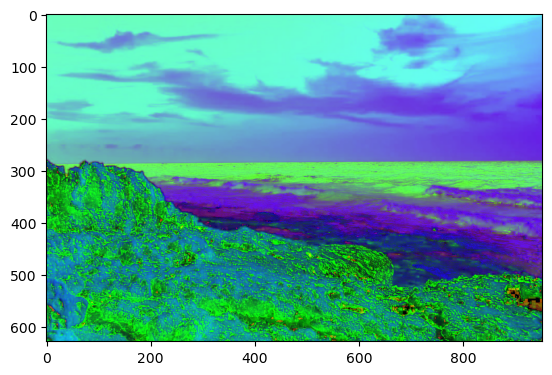

In [19]:
img_to_seg_HSV = cv.cvtColor(img_to_seg, cv.COLOR_RGB2HSV)
plt.figure()
plt.imshow(img_to_seg_HSV)
plt.show()

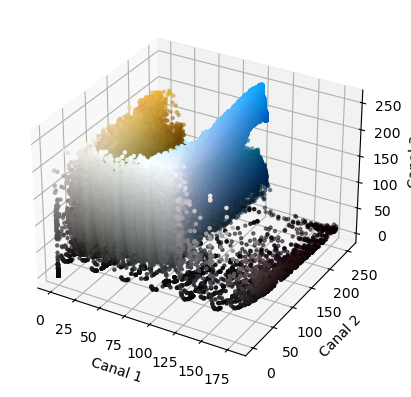

In [20]:
c1, c2, c3 = cv.split(img_to_seg_HSV)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_to_seg.reshape((np.shape(img_to_seg)[0] * np.shape(img_to_seg)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

En el histograma 3D de HSV se pueden observar secciones bien definidas para distintos colores.

### Segmentación

- Para la segmentación, se elige una sección de la zona que se desea segmentar, y de esa zona se calcula el promedio de los valores de HSV.
- Con el valor promedio de cada componente, se trabaja principalmente sobre H (hue) y se eligió un intervalo alrededor del promedio, ya que con este componente se puede identificar el color.
- Para los demás componentes (S: saturation y V: value) se ajustan manualmente hasta obtener el mejor resultado, basándose en los histogramas obtenidos a partir del segmento.

#### Cielo

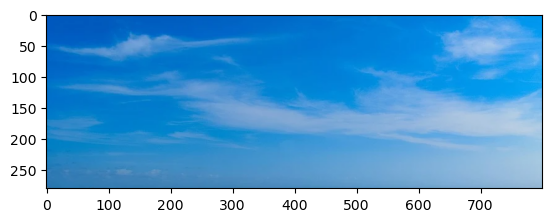

In [21]:
# Tomamos una muestra del cielo
sky_sample = img_to_seg[0:280, 0:800, :]
plt.figure()
plt.imshow(sky_sample)
plt.show()

In [22]:
sky_sample_hsv = img_to_seg_HSV[0:280, 0:800, :]
color_mean = cv.mean(sky_sample_hsv)
print(color_mean)

(103.04580803571429, 191.90663392857144, 211.4548348214286, 0.0)


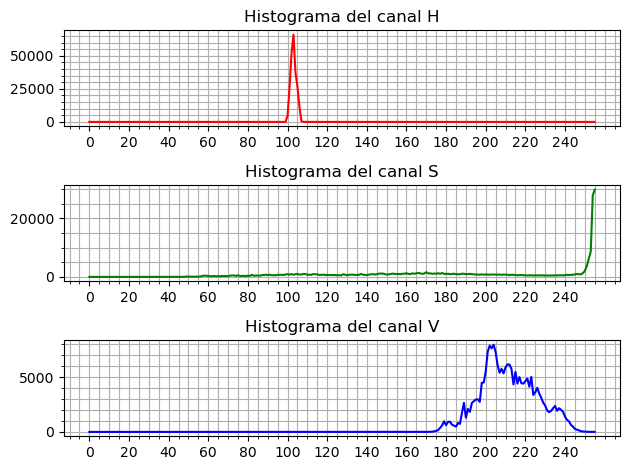

In [23]:
plot_hist(sky_sample_hsv, "HSV")

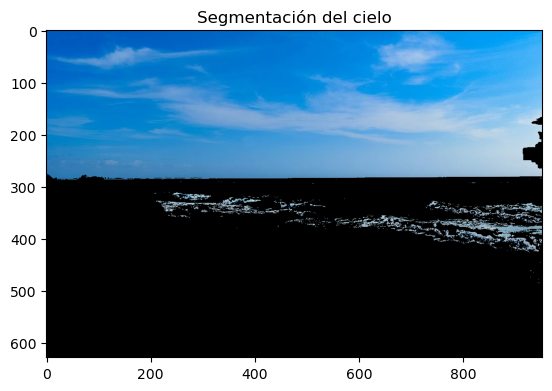

In [24]:
color_l = (97,40,170)
color_u = (109,255,255)

mask = cv.inRange(img_to_seg_HSV, color_l, color_u)
img_sky_seg = cv.bitwise_and(img_to_seg, img_to_seg, mask=mask)

plt.figure()
plt.title('Segmentación del cielo')
plt.imshow(img_sky_seg)
plt.show()

#### Agua

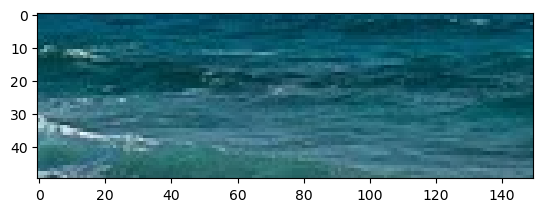

In [25]:
# Tomamos una muestra del agua
water_sample = img_to_seg[300:350, 500:650, :]
plt.figure()
plt.imshow(water_sample)
plt.show()

In [26]:
water_sample_hsv = img_to_seg_HSV[300:350, 500:650, :]
color_mean = cv.mean(water_sample_hsv)
print(color_mean)

(95.39826666666667, 186.11173333333335, 111.73426666666667, 0.0)


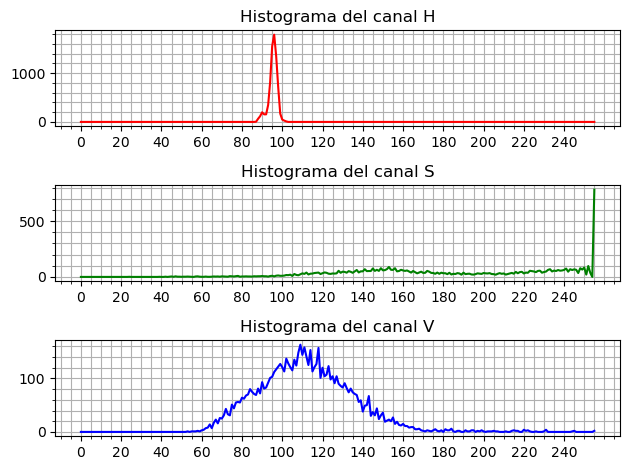

In [27]:
plot_hist(water_sample_hsv, "HSV")

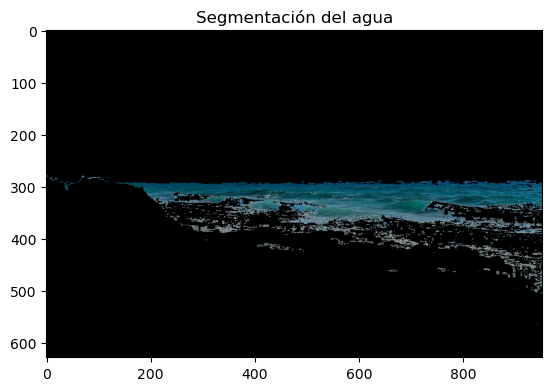

In [28]:
color_l = (85,10,10)
color_u = (101,255,180)

mask = cv.inRange(img_to_seg_HSV, color_l, color_u)
img_water_seg = cv.bitwise_and(img_to_seg, img_to_seg, mask=mask)

plt.figure()
plt.title('Segmentación del agua')
plt.imshow(img_water_seg)
plt.show()

#### Tierra

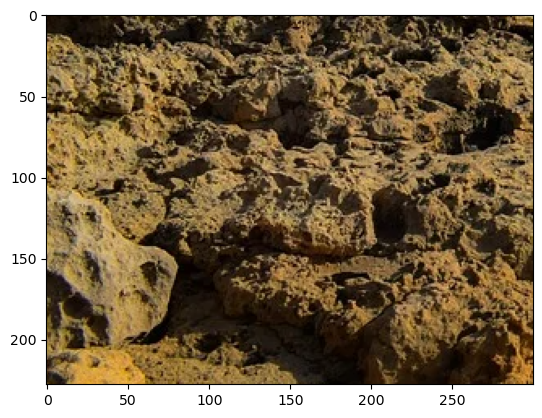

In [29]:
# Tomamos una muestra de la tierra
soil_sample = img_to_seg[400:, 0:300, :]
plt.figure()
plt.imshow(soil_sample)
plt.show()

In [30]:
soil_sample_hsv = img_to_seg_HSV[400:, 0:300, :]
color_mean = cv.mean(soil_sample_hsv)
print(color_mean)

(17.514122807017543, 155.2957894736842, 99.20961988304094, 0.0)


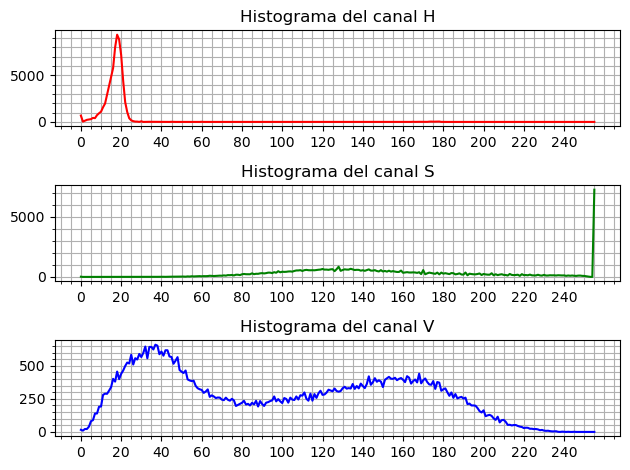

In [31]:
plot_hist(soil_sample_hsv, "HSV")

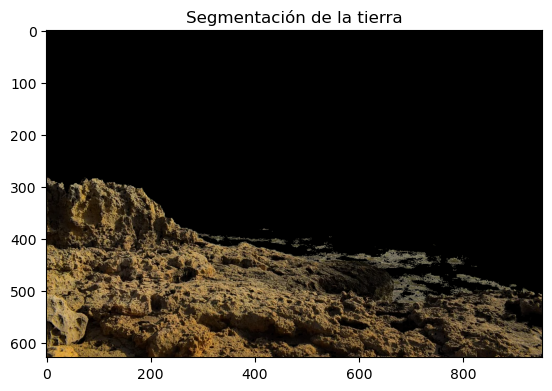

In [32]:
color_l = (0,40,0)
color_u = (30,255,240)

mask = cv.inRange(img_to_seg_HSV, color_l, color_u)
img_soil_seg = cv.bitwise_and(img_to_seg, img_to_seg, mask=mask)

plt.figure()
plt.title('Segmentación de la tierra')
plt.imshow(img_soil_seg)
plt.show()